# Viasat charging data

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

## Initial analysis and cleaning

In [31]:
# store and analyze dataset
viasatCharging_df_raw = pd.read_csv('data/viasatChargingData2024.csv')

# create a copy of the dataset to clean
viasatCharging_df = viasatCharging_df_raw.copy()

# print out first 5 rows
viasatCharging_df.head()

,Station Name,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Transaction Date (Pacific Time),Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),Energy (kWh),...,Transaction ID,Driver Zip/Postal Code,Start SOC,End SOC,County,System S/N,Model Number,OnRamp ID Tag,Payment Terminal Session ID,Vehicle MAC ID
0,CARLSBAD / CBD-N1-EVC-1,"Viasat, Inc.",2/16/2024 8:16,PST,2/16/2024 15:18,PST,2/16/2024 15:18,7:01:55,7:01:39,38.428,...,2908101111,92024,NaN,NaN,San Diego County,1.811410e+11,CT4020-HD-GW,NaN,NaN,NaN
1,CARLSBAD / CBD-N1-EVC-1,"Viasat, Inc.",2/15/2024 6:44,PST,2/15/2024 13:04,PST,2/15/2024 17:11,6:19:42,5:22:01,17.711,...,2905612841,92008,NaN,NaN,San Diego County,1.811410e+11,CT4020-HD-GW,NaN,NaN,NaN
2,CARLSBAD / CBD-N1-EVC-1,"Viasat, Inc.",2/14/2024 7:28,PST,2/14/2024 12:17,PST,2/14/2024 15:44,4:49:23,1:26:40,8.469,...,2903401331,92127,NaN,NaN,San Diego County,1.811410e+11,CT4020-HD-GW,NaN,NaN,NaN
3,CARLSBAD / CBD-N1-EVC-1,"Viasat, Inc.",2/13/2024 9:59,PST,2/13/2024 19:26,PST,2/13/2024 19:26,9:26:13,8:59:06,49.264,...,2901578491,92010,NaN,NaN,San Diego County,1.811410e+11,CT4020-HD-GW,NaN,NaN,NaN
4,CARLSBAD / CBD-N1-EVC-1,"Viasat, Inc.",2/13/2024 7:51,PST,2/13/2024 17:41,PST,2/13/2024 17:41,9:49:55,4:04:57,13.400,...,2901239801,92008,NaN,NaN,San Diego County,1.811410e+11,CT4020-HD-GW,NaN,NaN,NaN


In [32]:
# print out value counts
viasatCharging_df.count()

Station Name                       25430
Org Name                           25430
Start Date                         25430
Start Time Zone                    25430
End Date                           25419
End Time Zone                      25430
Transaction Date (Pacific Time)    25330
Total Duration (hh:mm:ss)          25430
Charging Time (hh:mm:ss)           25430
Energy (kWh)                       25430
GHG Savings (kg)                   25430
Gasoline Savings (gallons)         25430
Port Type                          25430
Port Number                        25430
Plug Type                          25430
EVSE ID                            25430
Address 1                          25430
Address 2                              0
City                               25430
State/Province                     25430
Zip/Postal Code                    25430
Country                            25430
Latitude                           25430
Longitude                          25430
Currency        

In [33]:
# remove columns with all null values
viasatCharging_df = viasatCharging_df.drop(columns = [
    'Address 2',
    'Start SOC',
    'End SOC',
    'OnRamp ID Tag',
    'Payment Terminal Session ID',
    'Vehicle MAC ID'])

In [34]:
# print out the unique elements for each column
for column in viasatCharging_df.columns:
    unique_values = viasatCharging_df[column].unique()
    print(f"Unique values for attribute '{column}':")
    print(unique_values)
    print()

Unique values for attribute 'Station Name':
['CARLSBAD / CBD-N1-EVC-1' 'CARLSBAD / CBD-N1-EVC-2'
 'CARLSBAD / CBD-N1-EVC-3' 'CARLSBAD / CBD-N1-EVC-4'
 'CARLSBAD / CBD-N2-EVC-1' 'CARLSBAD / CBD-N2-EVC-2'
 'CARLSBAD / CBD-N2-EVC-3' 'CARLSBAD / CBD-N2-EVC-4'
 'CARLSBAD / CBD-N2-EVC-5' 'CARLSBAD / CBD-N2-EVC-6'
 'CARLSBAD / CBD-W3-EVC-1' 'CARLSBAD / CBD-W3-EVC-2'
 'CARLSBAD / CBD-W3-EVC-3' 'CARLSBAD / CBD-W3-EVC-4'
 'CARLSBAD / CBD-W3-EVC-5' 'CARLSBAD / CBD-W3-EVC-6'
 'CARLSBAD / CBD-W3-EVC-7' 'CARLSBAD / COLLEGESTATION1'
 'CARLSBAD / COLLEGESTATION2' 'CARLSBAD / E1 EV 1' 'CARLSBAD / E1 EV1'
 'CARLSBAD / E1 UNIT 1' 'CARLSBAD / ENGLEWOOD 1' 'CARLSBAD / ENGLEWOOD 2'
 'CARLSBAD / GERMANTOWN #3' 'CARLSBAD / P1 EV1' 'CARLSBAD / P1 GL UNIT 15'
 'CARLSBAD / P1 GL UNIT 16' 'CARLSBAD / P1 GL UNIT 17'
 'CARLSBAD / P1 GL UNIT 18' 'CARLSBAD / P1 GL UNIT 19'
 'CARLSBAD / P1 GL UNIT 20' 'CARLSBAD / P1 GL UNIT 21'
 'CARLSBAD / P1 GL UNIT 29' 'CARLSBAD / P1 LL1 UNIT 10'
 'CARLSBAD / P1 LL1 UNIT 11' 'CARLS

In [35]:
# further clean dataset based on values observed

# drop new columns that provide no relevant information (to us)
viasatCharging_df = viasatCharging_df.drop(columns = [
    'Org Name',
    'Currency',
    'Fee',
    ])

# only keep information for California
viasatCharging_df = viasatCharging_df[viasatCharging_df['State/Province'] == 'California']

# print out the unique elements for each column
for column in viasatCharging_df.columns:
    unique_values = viasatCharging_df[column].unique()
    print(f"Unique values for attribute '{column}':")
    print(unique_values)
    print()

Unique values for attribute 'Station Name':
['CARLSBAD / CBD-N1-EVC-1' 'CARLSBAD / CBD-N1-EVC-2'
 'CARLSBAD / CBD-N1-EVC-3' 'CARLSBAD / CBD-N1-EVC-4'
 'CARLSBAD / CBD-N2-EVC-1' 'CARLSBAD / CBD-N2-EVC-2'
 'CARLSBAD / CBD-N2-EVC-3' 'CARLSBAD / CBD-N2-EVC-4'
 'CARLSBAD / CBD-N2-EVC-5' 'CARLSBAD / CBD-N2-EVC-6'
 'CARLSBAD / CBD-W3-EVC-1' 'CARLSBAD / CBD-W3-EVC-2'
 'CARLSBAD / CBD-W3-EVC-3' 'CARLSBAD / CBD-W3-EVC-4'
 'CARLSBAD / CBD-W3-EVC-5' 'CARLSBAD / CBD-W3-EVC-6'
 'CARLSBAD / CBD-W3-EVC-7' 'CARLSBAD / E1 EV 1' 'CARLSBAD / E1 EV1'
 'CARLSBAD / E1 UNIT 1' 'CARLSBAD / P1 EV1' 'CARLSBAD / P1 GL UNIT 15'
 'CARLSBAD / P1 GL UNIT 16' 'CARLSBAD / P1 GL UNIT 17'
 'CARLSBAD / P1 GL UNIT 18' 'CARLSBAD / P1 GL UNIT 19'
 'CARLSBAD / P1 GL UNIT 20' 'CARLSBAD / P1 GL UNIT 21'
 'CARLSBAD / P1 GL UNIT 29' 'CARLSBAD / P1 LL1 UNIT 10'
 'CARLSBAD / P1 LL1 UNIT 11' 'CARLSBAD / P1 LL1 UNIT 12'
 'CARLSBAD / P1 LL1 UNIT 13' 'CARLSBAD / P1 LL1 UNIT 14'
 'CARLSBAD / P1 LL1 UNIT 8' 'CARLSBAD / P1 LL1 UNIT 9'
 'C

In [36]:
# Filter rows where 'Start Date' is not null and 'End Date' is null
rows_with_start_no_end = viasatCharging_df[viasatCharging_df['Start Date'].notna() & viasatCharging_df['End Date'].isna()]

# Display the filtered rows
rows_with_start_no_end

,Station Name,Start Date,Start Time Zone,End Date,End Time Zone,Transaction Date (Pacific Time),Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),Energy (kWh),GHG Savings (kg),...,Country,Latitude,Longitude,Ended By,Plug In Event ID,Transaction ID,Driver Zip/Postal Code,County,System S/N,Model Number
1418,CARLSBAD / CBD-N1-EVC-2,2/19/2024 7:03,PST,NaN,PST,NaN,0:25:06,0:24:48,2.429,1.836,...,United States,33.128063,-117.265190,NaN,2658,2912930031,92127,San Diego County,1.618410e+11,CT4020-HD
2602,CARLSBAD / CBD-N1-EVC-4,2/19/2024 6:25,PST,NaN,PST,NaN,1:05:14,1:04:49,3.511,2.655,...,United States,33.127674,-117.265114,NaN,342,2912880471,92028,San Diego County,2.208410e+11,CT4020-HD-GW
8548,CARLSBAD / CBD-W3-EVC-3,2/19/2024 6:54,PST,NaN,PST,NaN,0:35:13,0:34:52,3.367,2.545,...,United States,33.126179,-117.267334,NaN,5037,2912917471,92011,San Diego County,1.735410e+11,CT4020-HD
9433,CARLSBAD / CBD-W3-EVC-4,2/19/2024 6:41,PST,NaN,PST,NaN,0:50:12,0:49:48,4.953,3.744,...,United States,33.126198,-117.267281,NaN,6139,2912900021,92078,San Diego County,1.735410e+11,CT4020-HD
10412,CARLSBAD / CBD-W3-EVC-5,2/19/2024 6:40,PST,NaN,PST,NaN,0:50:08,0:49:51,4.878,3.687,...,United States,33.126221,-117.267151,NaN,11748,2912898461,92591,San Diego County,1.345410e+11,CT4020-HD
11148,CARLSBAD / CBD-W3-EVC-6,2/19/2024 7:17,PST,NaN,PST,NaN,0:10:11,0:09:50,0.944,0.714,...,United States,33.126236,-117.267097,NaN,1708355855,2912948731,92128,San Diego County,1.345410e+11,CT4020-HD
12126,CARLSBAD / CBD-W3-EVC-7,2/19/2024 6:41,PST,NaN,PST,NaN,0:50:25,0:49:50,4.577,3.460,...,United States,33.126251,-117.267044,NaN,10324,2912899801,92011,San Diego County,1.346410e+11,CT4020-HD-GW
12127,CARLSBAD / CBD-W3-EVC-7,2/19/2024 7:29,PST,NaN,PST,NaN,0:01:54,0:01:28,0.068,0.051,...,United States,33.126251,-117.267044,NaN,10325,2912962871,92057,San Diego County,1.346410e+11,CT4020-HD-GW
12498,CARLSBAD / E1 EV1,2/19/2024 7:31,PST,NaN,PST,NaN,0:00:29,0:00:18,0.009,0.006,...,United States,33.126324,-117.264977,NaN,188,2912966121,92009,San Diego County,2.312410e+11,CT4020-HD2-GW-LTE
16146,CARLSBAD / P1 LL1 UNIT 11,2/18/2024 16:59,PST,NaN,PST,NaN,14:30:19,10:15:11,63.914,48.319,...,United States,33.124580,-117.265091,NaN,1005,2912263721,92010,San Diego County,1.824410e+11,CT4020-HD


In [37]:
# remove new non-relevant data
viasatCharging_df = viasatCharging_df.drop(columns = [
    'Start Time Zone',
    'End Time Zone',
    'County'
    ])

# remove rows with null end date values
viasatCharging_df = viasatCharging_df[viasatCharging_df['End Date'].notna()]

In [38]:
transaction_date_na = viasatCharging_df[viasatCharging_df['Transaction Date (Pacific Time)'].isna()]

transaction_date_na

,Station Name,Start Date,End Date,Transaction Date (Pacific Time),Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),Energy (kWh),GHG Savings (kg),Gasoline Savings (gallons),Port Type,...,Zip/Postal Code,Country,Latitude,Longitude,Ended By,Plug In Event ID,Transaction ID,Driver Zip/Postal Code,System S/N,Model Number
721,CARLSBAD / CBD-N1-EVC-1,11/6/2023 10:05,11/7/2023 7:26,NaN,5:10:04,5:02:18,30.814,21.878,3.867,Level 2,...,92009,United States,33.128059,-117.265137,NaN,2981,2719774351,92009,1.811410e+11,CT4020-HD-GW
722,CARLSBAD / CBD-N1-EVC-1,11/27/2023 7:51,11/28/2023 11:12,NaN,1:25:37,1:21:39,8.228,5.842,1.033,Level 2,...,92009,United States,33.128059,-117.265137,NaN,3001,2755928341,92008,1.811410e+11,CT4020-HD-GW
723,CARLSBAD / CBD-N1-EVC-1,12/1/2023 6:54,12/1/2023 13:39,NaN,6:45:17,5:49:46,35.428,25.154,4.446,Level 2,...,92009,United States,33.128059,-117.265137,Ghost session closed,1701442450,2764605481,91913,1.811410e+11,CT4020-HD-GW
724,CARLSBAD / CBD-N1-EVC-1,12/6/2023 8:23,12/6/2023 13:12,NaN,2:50:11,1:38:05,5.102,3.857,0.640,Level 2,...,92009,United States,33.128059,-117.265137,NaN,3018,2773878361,92024,1.811410e+11,CT4020-HD-GW
725,CARLSBAD / CBD-N1-EVC-1,12/7/2023 8:11,12/7/2023 12:09,NaN,2:45:08,2:23:02,7.637,5.773,0.958,Level 2,...,92009,United States,33.128059,-117.265137,NaN,3024,2776054591,92024,1.811410e+11,CT4020-HD-GW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13403,CARLSBAD / P1 GL UNIT 15,10/25/2023 7:38,10/25/2023 11:08,NaN,3:30:03,3:29:51,21.009,14.916,2.637,Level 2,...,92009,United States,33.124233,-117.265373,Ghost session closed,857,2696976091,92082,1.840410e+11,CT4020-HD-GW
15376,CARLSBAD / P1 GL UNIT 21,4/27/2023 8:46,4/27/2023 16:03,NaN,0:05:15,0:04:02,0.384,0.273,0.048,Level 2,...,92009,United States,33.124832,-117.265160,NaN,1424,1823299521,92084,1.450410e+11,CT4020-HD-GW
15377,CARLSBAD / P1 GL UNIT 21,5/25/2023 8:55,5/25/2023 12:12,NaN,0:00:29,0:00:13,0.010,0.007,0.001,Level 2,...,92009,United States,33.124832,-117.265160,NaN,1465,1870434301,92027,1.450410e+11,CT4020-HD-GW
17151,CARLSBAD / P1 LL1 UNIT 14,9/8/2023 5:57,9/8/2023 6:17,NaN,0:19:23,0:19:00,0.000,0.000,0.000,Level 2,...,92009,United States,33.124920,-117.264969,NaN,1496,2610228911,92126,1.835410e+11,CT4020-HD-GW


In [39]:
# 
transaction_date_not_equal_end = viasatCharging_df[(viasatCharging_df['Transaction Date (Pacific Time)'] != viasatCharging_df['End Date']) & viasatCharging_df['Transaction Date (Pacific Time)'].notna()]

# Display the filtered rows
transaction_date_not_equal_end

,Station Name,Start Date,End Date,Transaction Date (Pacific Time),Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),Energy (kWh),GHG Savings (kg),Gasoline Savings (gallons),Port Type,...,Zip/Postal Code,Country,Latitude,Longitude,Ended By,Plug In Event ID,Transaction ID,Driver Zip/Postal Code,System S/N,Model Number
1,CARLSBAD / CBD-N1-EVC-1,2/15/2024 6:44,2/15/2024 13:04,2/15/2024 17:11,6:19:42,5:22:01,17.711,13.390,2.223,Level 2,...,92009,United States,33.128059,-117.265137,Plug Out at Vehicle,3117,2905612841,92008,1.811410e+11,CT4020-HD-GW
2,CARLSBAD / CBD-N1-EVC-1,2/14/2024 7:28,2/14/2024 12:17,2/14/2024 15:44,4:49:23,1:26:40,8.469,6.403,1.063,Level 2,...,92009,United States,33.128059,-117.265137,Plug Out at Vehicle,3115,2903401331,92127,1.811410e+11,CT4020-HD-GW
25,CARLSBAD / CBD-N1-EVC-1,1/26/2024 11:53,1/26/2024 16:02,1/26/2024 18:32,4:09:19,2:51:55,9.350,7.069,1.173,Level 2,...,92009,United States,33.128059,-117.265137,Plug Out at Vehicle,3093,2866883031,92008,1.811410e+11,CT4020-HD-GW
27,CARLSBAD / CBD-N1-EVC-1,1/25/2024 12:58,1/25/2024 14:10,1/25/2024 15:33,1:11:58,1:11:48,3.951,2.987,0.496,Level 2,...,92009,United States,33.128059,-117.265137,Plug Out at Vehicle,3091,2865201741,92009,1.811410e+11,CT4020-HD-GW
28,CARLSBAD / CBD-N1-EVC-1,1/25/2024 7:33,1/25/2024 12:19,1/25/2024 15:33,4:45:42,0:56:47,5.527,4.178,0.694,Level 2,...,92009,United States,33.128059,-117.265137,Plug Out at Vehicle,3089,2864107081,92127,1.811410e+11,CT4020-HD-GW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25121,CARLSBAD / P2 LL1 UNIT 8,5/19/2023 7:43,5/19/2023 11:39,5/19/2023 11:42,3:55:31,3:55:10,12.680,9.003,1.591,Level 2,...,92009,United States,33.125858,-117.263573,CPS Server,850,1860638791,92009,1.820410e+11,CT4010-HD-GW
25134,CARLSBAD / P2 LL1 UNIT 8,4/27/2023 8:51,4/27/2023 18:54,4/27/2023 18:57,10:03:36,6:36:10,14.389,10.216,1.806,Level 2,...,92009,United States,33.125858,-117.263573,CPS Server,1682610675,1823312101,92008,1.820410e+11,CT4010-HD-GW
25183,CARLSBAD / P2 LL1 UNIT 8,2/20/2023 9:37,2/20/2023 15:08,2/20/2023 15:11,5:31:22,5:31:09,15.349,10.898,1.926,Level 2,...,92009,United States,33.125858,-117.263573,CPS Server,789,1718742161,92081,1.820410e+11,CT4010-HD-GW
25350,CARLSBAD / P2 LL1 UNIT 9,6/8/2023 7:56,6/8/2023 17:10,6/8/2023 17:44,9:14:11,6:09:17,20.124,14.288,2.526,Level 2,...,92009,United States,33.125835,-117.263573,Plug Out at Vehicle,751,2240741221,92010,1.820410e+11,NaN


In [40]:
# 
transaction_date_equal_end = viasatCharging_df[(viasatCharging_df['Transaction Date (Pacific Time)'] == viasatCharging_df['End Date']) & viasatCharging_df['Transaction Date (Pacific Time)'].notna()]

# Display the filtered rows
transaction_date_equal_end

,Station Name,Start Date,End Date,Transaction Date (Pacific Time),Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),Energy (kWh),GHG Savings (kg),Gasoline Savings (gallons),Port Type,...,Zip/Postal Code,Country,Latitude,Longitude,Ended By,Plug In Event ID,Transaction ID,Driver Zip/Postal Code,System S/N,Model Number
0,CARLSBAD / CBD-N1-EVC-1,2/16/2024 8:16,2/16/2024 15:18,2/16/2024 15:18,7:01:55,7:01:39,38.428,29.052,4.823,Level 2,...,92009,United States,33.128059,-117.265137,Plug Out at Vehicle,3119,2908101111,92024,1.811410e+11,CT4020-HD-GW
3,CARLSBAD / CBD-N1-EVC-1,2/13/2024 9:59,2/13/2024 19:26,2/13/2024 19:26,9:26:13,8:59:06,49.264,37.244,6.183,Level 2,...,92009,United States,33.128059,-117.265137,Customer,3114,2901578491,92010,1.811410e+11,CT4020-HD-GW
4,CARLSBAD / CBD-N1-EVC-1,2/13/2024 7:51,2/13/2024 17:41,2/13/2024 17:41,9:49:55,4:04:57,13.400,10.130,1.682,Level 2,...,92009,United States,33.128059,-117.265137,Plug Out at Vehicle,3113,2901239801,92008,1.811410e+11,CT4020-HD-GW
5,CARLSBAD / CBD-N1-EVC-1,2/9/2024 7:55,2/9/2024 11:11,2/9/2024 11:11,3:15:51,2:53:54,9.510,7.190,1.194,Level 2,...,92009,United States,33.128059,-117.265137,Customer,3112,2894111111,92008,1.811410e+11,CT4020-HD-GW
6,CARLSBAD / CBD-N1-EVC-1,2/8/2024 8:25,2/8/2024 16:35,2/8/2024 16:35,8:10:09,1:59:23,5.821,4.400,0.730,Level 2,...,92009,United States,33.128059,-117.265137,Plug Out at Vehicle,3110,2891947871,92024,1.811410e+11,CT4020-HD-GW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25425,CARLSBAD / P2 LL1 UNIT 9,2/24/2023 9:40,2/24/2023 17:56,2/24/2023 17:56,8:16:07,8:09:48,26.816,19.039,3.365,Level 2,...,92009,United States,33.125835,-117.263573,Customer,668,1725179101,92121,1.820410e+11,CT4010-HD-GW
25426,CARLSBAD / P2 LL1 UNIT 9,2/23/2023 9:56,2/23/2023 12:42,2/23/2023 12:42,2:46:30,2:22:03,7.268,5.160,0.912,Level 2,...,92009,United States,33.125835,-117.263573,Plug Out at Vehicle,667,1723630571,92064,1.820410e+11,CT4010-HD-GW
25427,CARLSBAD / P2 LL1 UNIT 9,2/22/2023 9:14,2/22/2023 17:59,2/22/2023 17:59,8:45:36,4:00:17,12.587,8.937,1.580,Level 2,...,92009,United States,33.125835,-117.263573,Plug Out at Vehicle,666,1721900031,92109,1.820410e+11,CT4010-HD-GW
25428,CARLSBAD / P2 LL1 UNIT 9,2/21/2023 6:19,2/21/2023 15:24,2/21/2023 15:24,9:04:24,8:58:38,29.317,20.815,3.679,Level 2,...,92009,United States,33.125835,-117.263573,Customer,665,1719879191,92805,1.820410e+11,CT4010-HD-GW


In [41]:
# drop transaction date because it's equal to end date
# viasatCharging_df = viasatCharging_df.drop(columns = [
#     'Transaction Date (Pacific Time)'
#     ])

# separating start date and end date into date and time columns
start_dates = viasatCharging_df['Start Date'].apply(lambda x: datetime.strptime(x, '%m/%d/%Y %H:%M').date())
start_times = viasatCharging_df['Start Date'].apply(lambda x: datetime.strptime(x, '%m/%d/%Y %H:%M').time())
end_dates = viasatCharging_df['End Date'].apply(lambda x: datetime.strptime(x, '%m/%d/%Y %H:%M').date())
end_times = viasatCharging_df['End Date'].apply(lambda x: datetime.strptime(x, '%m/%d/%Y %H:%M').time())

viasatCharging_df = viasatCharging_df.drop(columns = [
    'Start Date',
    'End Date'
    ])

viasatCharging_df['Start Date'], viasatCharging_df['Start Time'] = start_dates, start_times
viasatCharging_df['End Date'], viasatCharging_df['End Time'] = end_dates, end_times

viasatCharging_df.head()

,Station Name,Transaction Date (Pacific Time),Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),Energy (kWh),GHG Savings (kg),Gasoline Savings (gallons),Port Type,Port Number,Plug Type,...,Ended By,Plug In Event ID,Transaction ID,Driver Zip/Postal Code,System S/N,Model Number,Start Date,Start Time,End Date,End Time
0,CARLSBAD / CBD-N1-EVC-1,2/16/2024 15:18,7:01:55,7:01:39,38.428,29.052,4.823,Level 2,2,J1772,...,Plug Out at Vehicle,3119,2908101111,92024,1.811410e+11,CT4020-HD-GW,2024-02-16,08:16:00,2024-02-16,15:18:00
1,CARLSBAD / CBD-N1-EVC-1,2/15/2024 17:11,6:19:42,5:22:01,17.711,13.390,2.223,Level 2,2,J1772,...,Plug Out at Vehicle,3117,2905612841,92008,1.811410e+11,CT4020-HD-GW,2024-02-15,06:44:00,2024-02-15,13:04:00
2,CARLSBAD / CBD-N1-EVC-1,2/14/2024 15:44,4:49:23,1:26:40,8.469,6.403,1.063,Level 2,2,J1772,...,Plug Out at Vehicle,3115,2903401331,92127,1.811410e+11,CT4020-HD-GW,2024-02-14,07:28:00,2024-02-14,12:17:00
3,CARLSBAD / CBD-N1-EVC-1,2/13/2024 19:26,9:26:13,8:59:06,49.264,37.244,6.183,Level 2,1,J1772,...,Customer,3114,2901578491,92010,1.811410e+11,CT4020-HD-GW,2024-02-13,09:59:00,2024-02-13,19:26:00
4,CARLSBAD / CBD-N1-EVC-1,2/13/2024 17:41,9:49:55,4:04:57,13.400,10.130,1.682,Level 2,2,J1772,...,Plug Out at Vehicle,3113,2901239801,92008,1.811410e+11,CT4020-HD-GW,2024-02-13,07:51:00,2024-02-13,17:41:00


In [42]:
# keep data relevant for analysis
viasatCharging_analysis= viasatCharging_df.drop(columns = [
    'Port Type',
    'Plug Type',
    'City',
    'State/Province',
    'Country',
    'Latitude',
    'Longitude'
    ])

viasatCharging_analysis

,Station Name,Transaction Date (Pacific Time),Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),Energy (kWh),GHG Savings (kg),Gasoline Savings (gallons),Port Number,EVSE ID,Address 1,...,Ended By,Plug In Event ID,Transaction ID,Driver Zip/Postal Code,System S/N,Model Number,Start Date,Start Time,End Date,End Time
0,CARLSBAD / CBD-N1-EVC-1,2/16/2024 15:18,7:01:55,7:01:39,38.428,29.052,4.823,2,124255,6155 El Camino Real,...,Plug Out at Vehicle,3119,2908101111,92024,1.811410e+11,CT4020-HD-GW,2024-02-16,08:16:00,2024-02-16,15:18:00
1,CARLSBAD / CBD-N1-EVC-1,2/15/2024 17:11,6:19:42,5:22:01,17.711,13.390,2.223,2,124255,6155 El Camino Real,...,Plug Out at Vehicle,3117,2905612841,92008,1.811410e+11,CT4020-HD-GW,2024-02-15,06:44:00,2024-02-15,13:04:00
2,CARLSBAD / CBD-N1-EVC-1,2/14/2024 15:44,4:49:23,1:26:40,8.469,6.403,1.063,2,124255,6155 El Camino Real,...,Plug Out at Vehicle,3115,2903401331,92127,1.811410e+11,CT4020-HD-GW,2024-02-14,07:28:00,2024-02-14,12:17:00
3,CARLSBAD / CBD-N1-EVC-1,2/13/2024 19:26,9:26:13,8:59:06,49.264,37.244,6.183,1,124255,6155 El Camino Real,...,Customer,3114,2901578491,92010,1.811410e+11,CT4020-HD-GW,2024-02-13,09:59:00,2024-02-13,19:26:00
4,CARLSBAD / CBD-N1-EVC-1,2/13/2024 17:41,9:49:55,4:04:57,13.400,10.130,1.682,2,124255,6155 El Camino Real,...,Plug Out at Vehicle,3113,2901239801,92008,1.811410e+11,CT4020-HD-GW,2024-02-13,07:51:00,2024-02-13,17:41:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25425,CARLSBAD / P2 LL1 UNIT 9,2/24/2023 17:56,8:16:07,8:09:48,26.816,19.039,3.365,1,731651,2537 Town Garden Rd,...,Customer,668,1725179101,92121,1.820410e+11,CT4010-HD-GW,2023-02-24,09:40:00,2023-02-24,17:56:00
25426,CARLSBAD / P2 LL1 UNIT 9,2/23/2023 12:42,2:46:30,2:22:03,7.268,5.160,0.912,1,731651,2537 Town Garden Rd,...,Plug Out at Vehicle,667,1723630571,92064,1.820410e+11,CT4010-HD-GW,2023-02-23,09:56:00,2023-02-23,12:42:00
25427,CARLSBAD / P2 LL1 UNIT 9,2/22/2023 17:59,8:45:36,4:00:17,12.587,8.937,1.580,1,731651,2537 Town Garden Rd,...,Plug Out at Vehicle,666,1721900031,92109,1.820410e+11,CT4010-HD-GW,2023-02-22,09:14:00,2023-02-22,17:59:00
25428,CARLSBAD / P2 LL1 UNIT 9,2/21/2023 15:24,9:04:24,8:58:38,29.317,20.815,3.679,1,731651,2537 Town Garden Rd,...,Customer,665,1719879191,92805,1.820410e+11,CT4010-HD-GW,2023-02-21,06:19:00,2023-02-21,15:24:00


## Plotting

(array([2.508e+03, 2.054e+03, 2.548e+03, 2.354e+03, 2.482e+03, 2.064e+03,
        1.456e+03, 1.331e+03, 1.124e+03, 1.113e+03, 1.024e+03, 9.250e+02,
        7.590e+02, 5.790e+02, 4.740e+02, 4.210e+02, 3.710e+02, 2.860e+02,
        2.680e+02, 2.170e+02, 1.160e+02, 6.300e+01, 4.900e+01, 2.100e+01,
        1.400e+01, 9.000e+00, 8.000e+00, 8.000e+00, 3.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  0.      ,   2.634025,   5.26805 ,   7.902075,  10.5361  ,
         13.170125,  15.80415 ,  18.438175,  21.0722  ,  23.706225,
         26.34025 ,  28.974275,  31.6083  ,  34.242325,  36.87635 ,
         39.510375,  42.1444  ,  44.778425,  47.41245 ,  50.046475,
         52.6805  ,  55.314525,  57.94855 ,  60.582575,  63.2166  ,
         65.850625,  68.48465 ,  71.118675,  73.7527  ,  76.386725,
         79.02075 ,  81.654775,  84.2888  ,  86.922825,  89.55685 ,
         92.190875,  94.82

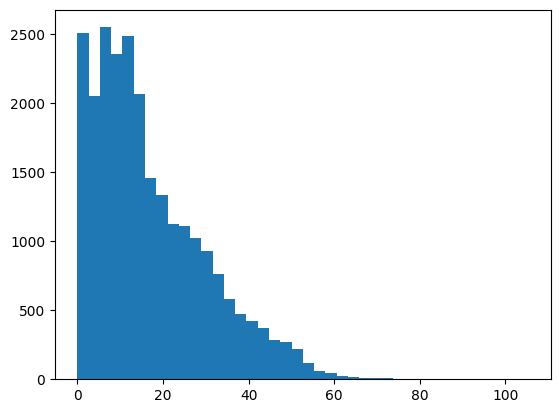

In [43]:
plt.hist(data=viasatCharging_df, x='Energy (kWh)', bins=40)

(array([3999., 2868., 2628., 2592., 2446., 2336., 2189., 2034., 1874.,
        1687.]),
 array([    0. ,  1611.6,  3223.2,  4834.8,  6446.4,  8058. ,  9669.6,
        11281.2, 12892.8, 14504.4, 16116. ]),
 <BarContainer object of 10 artists>)

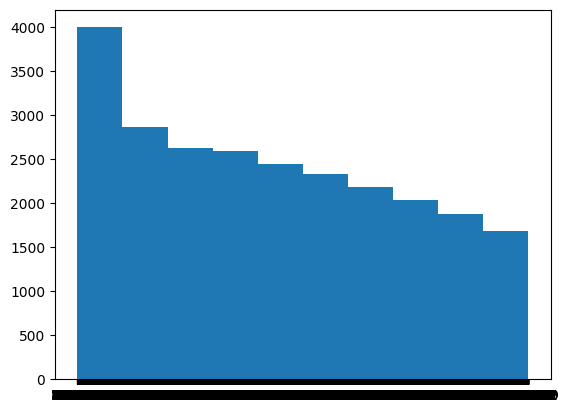

In [44]:
# distribution of load, number of transaction binned by 5 kwh bins, bar chart per transaction
plt.hist(data=viasatCharging_df, x='Charging Time (hh:mm:ss)', bins=10)

In [59]:
dailyTotalEnergy = viasatCharging_df.groupby('Start Date').agg({'Energy (kWh)': 'sum', 'Transaction ID': 'count'}).sort_values(by='Energy (kWh)',ascending=False).reset_index()
dailyTotalEnergy.head(30)

,Start Date,Energy (kWh),Transaction ID
0,2023-09-05,2467.562,128
1,2023-09-26,2291.701,111
2,2023-09-12,2240.454,118
3,2023-08-28,2229.459,108
4,2023-07-11,2201.823,108
5,2023-06-20,2194.460,127
6,2023-07-25,2170.535,112
7,2023-07-19,2164.340,125
8,2023-04-26,2149.102,139
9,2023-07-24,2133.398,115


In [60]:
dailyTotalEnergy.tail(30)

,Start Date,Energy (kWh),Transaction ID
335,2023-03-11,68.370,10
336,2023-11-24,67.393,4
337,2023-02-25,66.268,4
338,2023-08-19,65.455,5
339,2023-02-19,63.616,4
340,2023-11-25,63.251,5
341,2023-09-17,59.976,5
342,2023-03-18,58.152,6
343,2024-01-13,57.303,1
344,2023-08-20,56.896,4


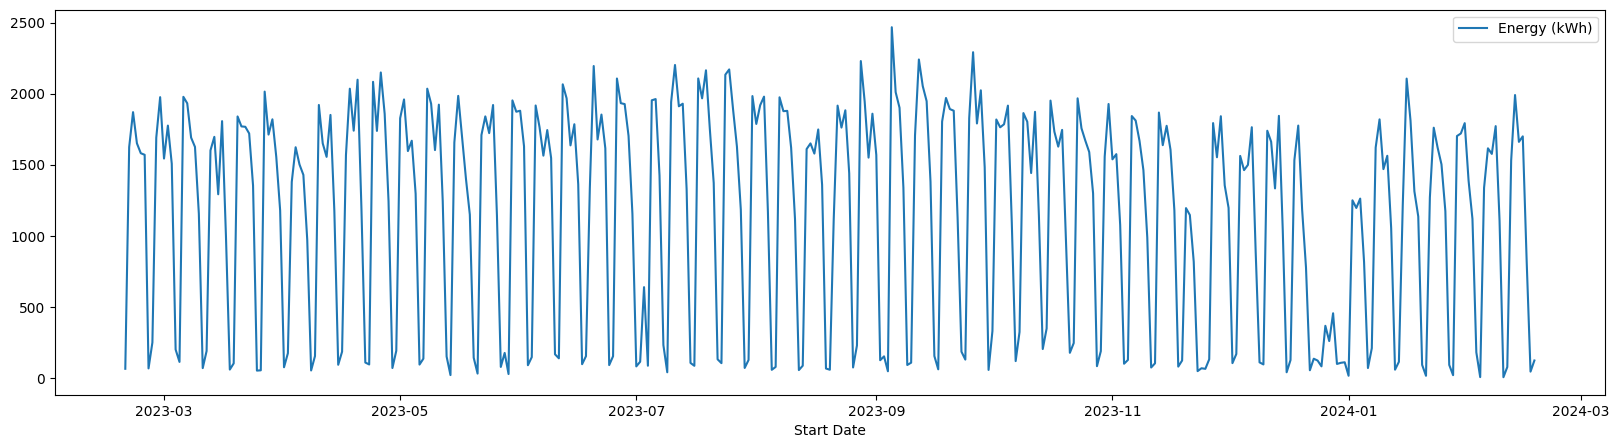

In [61]:
fig = dailyTotalEnergy.plot(x='Start Date', y='Energy (kWh)', figsize=(20, 5))

<Axes: xlabel='Energy (kWh)'>

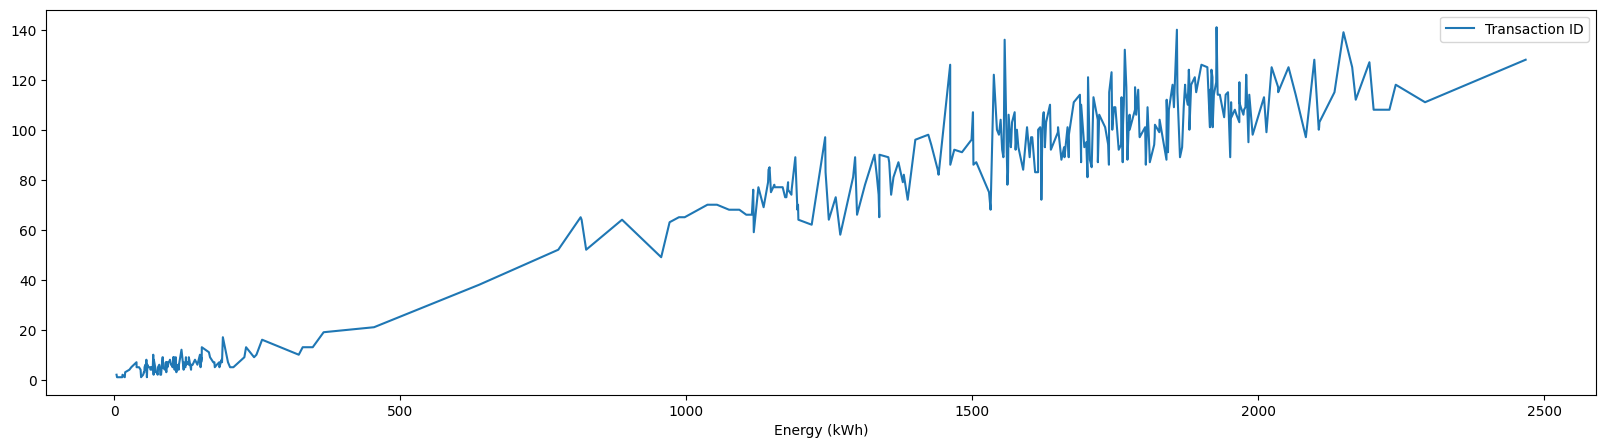

In [62]:
dailyTotalEnergy.plot(y='Transaction ID', x='Energy (kWh)', figsize=(20, 5))

<Axes: >

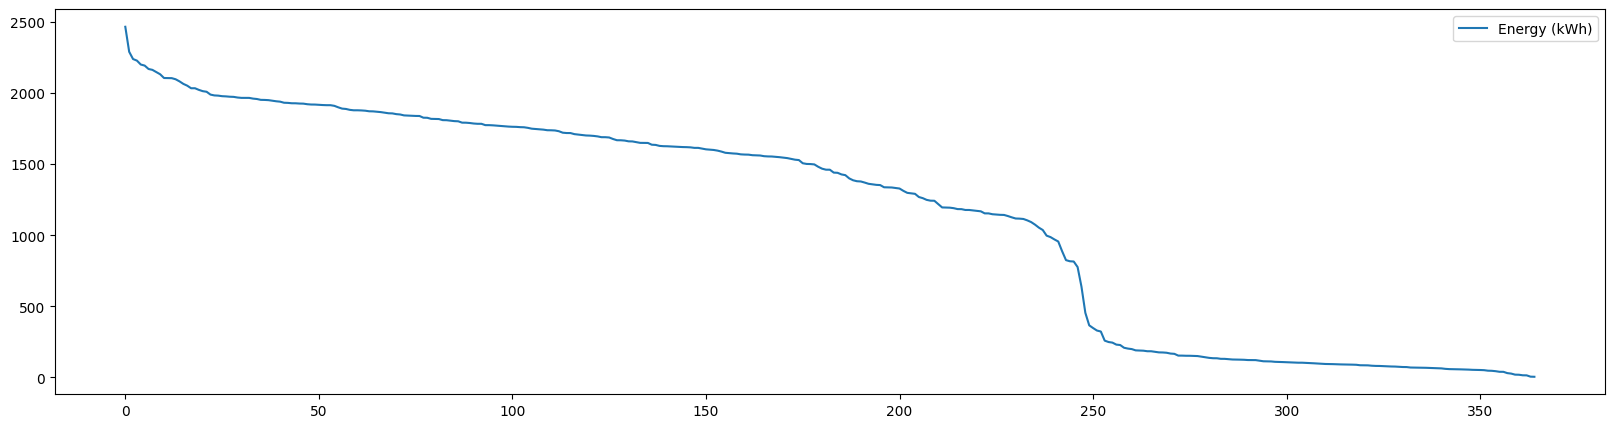

In [63]:
dailyTotalEnergy.plot(y='Energy (kWh)', figsize=(20, 5))

In [64]:
dailyTotalEnergy.tail(20)

,Start Date,Energy (kWh),Transaction ID
345,2023-08-05,56.375,8
346,2023-09-30,55.594,4
347,2023-08-12,54.620,6
348,2023-12-22,53.188,5
349,2023-03-26,52.898,3
350,2023-04-08,51.891,3
351,2023-03-25,50.771,2
352,2023-11-23,47.134,1
353,2023-09-04,46.254,4
354,2024-02-17,43.545,5


In [65]:
viasatChargingData = viasatCharging_df.copy()

In [66]:
viasatChargingData[viasatChargingData['Plug In Event ID'] == 611]

,Station Name,Transaction Date (Pacific Time),Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),Energy (kWh),GHG Savings (kg),Gasoline Savings (gallons),Port Type,Port Number,Plug Type,...,Ended By,Plug In Event ID,Transaction ID,Driver Zip/Postal Code,System S/N,Model Number,Start Date,Start Time,End Date,End Time
2979,CARLSBAD / CBD-N2-EVC-1,7/6/2023 17:49,10:21:32,2:24:33,7.613,5.405,0.955,Level 2,2,J1772,...,Plug Out at Vehicle,611,2499946561,92028,1.824410e+11,CT4020-HD,2023-07-06,07:28:00,2023-07-06,17:49:00
21221,CARLSBAD / P2 GL UNIT 17,7/17/2023 12:55,4:17:08,4:10:35,13.324,9.460,1.672,Level 2,1,J1772,...,Customer,611,2517747201,92011,1.903410e+11,CT4010-HD-GW,2023-07-17,08:38:00,2023-07-17,12:55:00


In [53]:
viasatChargingData['Model Number'].value_counts()

CT4020-HD            13566
CT4020-HD-GW          9877
CT4010-HD-GW           703
CT4020-HD2-GW-LTE      176
Name: Model Number, dtype: int64

In [54]:
viasatChargingData['Ended By'].value_counts()

Plug Out at Vehicle             14408
Customer                         8693
CPS Server                       1069
Timeout                           291
Plug Removed While Rebooting       84
Ghost session closed               23
Unknown                            16
Outlet Unreachable                  2
ghost_session                       1
Station Offline                     1
Name: Ended By, dtype: int64

In [55]:
viasatChargingData['System S/N'].nunique()

28

In [56]:
viasatChargingData['Plug Type'].value_counts()

J1772    24653
Name: Plug Type, dtype: int64

In [57]:
viasatChargingData['Plug In Event ID'].nunique()

9781

In [58]:
viasatChargingData['System S/N'].value_counts()

1.824410e+11    4087
1.834410e+11    2357
1.735410e+11    2319
1.825410e+11    2178
1.345410e+11    1713
1.618410e+11    1435
1.840410e+11     989
1.346410e+11     977
1.547410e+11     934
1.739410e+11     841
1.937410e+11     803
1.539410e+11     678
1.811410e+11     670
1.604410e+11     582
1.450410e+11     518
1.820410e+11     490
1.505410e+11     402
1.850410e+11     375
1.835410e+11     364
1.830410e+11     350
2.208410e+11     339
1.540410e+11     272
2.013410e+11     221
1.838410e+11     205
2.312410e+11     176
1.814410e+11     157
1.903410e+11     137
1.841410e+11      84
Name: System S/N, dtype: int64